<a href="https://colab.research.google.com/github/benjaminmwo/Exercise---enviroment/blob/main/accident%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#loading dataset
import pandas as pd
ben = pd.read_csv('/content/driverresponse.csv')
print("shape of the data set",ben.shape)
ben.head()



shape of the data set (36, 21)


,index,sno,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,...,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
0,0,1,Andhra Pradesh,south,2,594,12747.0,507,328,668,...,154,1938,128,17286,40,667,325,1024,306,2868
1,1,2,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,...,0,22,15,45,0,7,11,8,8,18
2,2,3,Assam,northeast,5,613,4596.0,129,104,156,...,3,628,352,3520,64,334,156,371,3,873
3,3,4,Bihar,north,1,1680,1496.0,278,236,308,...,72,439,593,2323,8,458,156,573,122,612
4,4,5,Chhattisgarh,centre,9,335,6720.0,188,313,266,...,81,520,145,6660,62,410,175,467,144,953


In [32]:
# Have a glance at the dependent and independent variables.
import pandas as pd
ben = pd.read_csv('/content/driverresponse.csv')
data = ben.loc[:,['stateut','asleep2016'	]]
data.head(18)



,stateut,asleep2016
0,Andhra Pradesh,306
1,Arunachal Pradesh,8
2,Assam,3
3,Bihar,122
4,Chhattisgarh,144
5,Goa,4
6,Gujarat,156
7,Haryana,462
8,Himachal Pradesh,0
9,Jammu & Kashmir,0


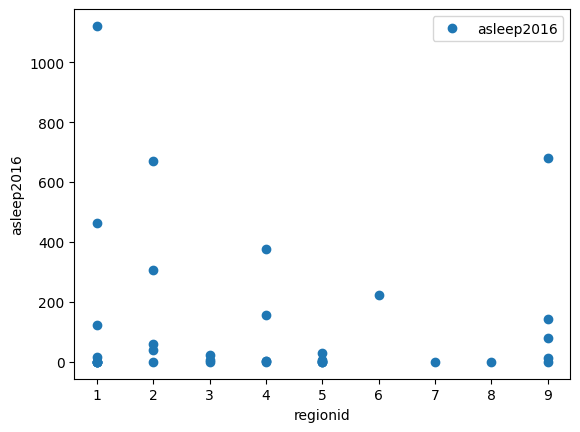

In [33]:
 #Visualize the change in the variables.

 import pandas as pd
 import matplotlib.pyplot as plt
 ben = pd.read_csv('/content/driverresponse.csv')
 ben.plot(x='regionid', y='asleep2016',style='o')
 plt.xlabel('regionid')
 plt.ylabel('asleep2016')
 plt.legend()
 plt.show()






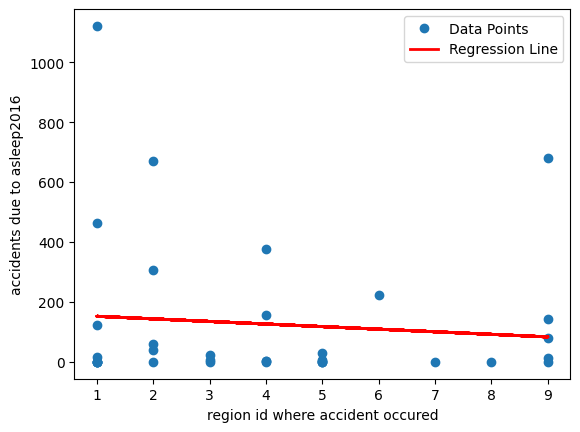

In [34]:
#Adding a Regression Line
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ben = pd.read_csv('/content/driverresponse.csv')
x = ben[['regionid']]
y = ben['asleep2016']
y2 = ben['overtaking2016']
regressor = LinearRegression()
regressor.fit(x, y)
regressor.fit(x,y)

# Scatter plot of data points
ben.plot(x='regionid', y='asleep2016', style='o', label='Data Points')
#ben.plot(x='regionid', y='overtaking2016', style='o', label='Data Points')

# Regression line plot
plt.plot(x, regressor.predict(x), color='red', linewidth=2, label='Regression Line')
#plt.plot(x, regressor.predict(x), color='green', linewidth=2, label='Regression Line')
plt.xlabel('region id where accident occured')
plt.ylabel('accidents due to asleep2016')
#plt.xlabel ('regionid')
#plt.ylabel('overtaking2016')
plt.legend()
plt.show()  # To display the plot






In [ ]:
#Divide the data into independent and dependent variables.
import pandas as pd
ben = pd.read_csv('/content/driverresponse.csv')
x = pd.DataFrame(data['regionid'])
y = pd.DataFrame(data['asleep2016'])



In [40]:
# Split the data into train and test sets
import pandas as pd
from sklearn.model_selection import train_test_split
ben = pd.read_csv('/content/driverresponse.csv')
x = pd.DataFrame(ben['regionid'])
y = pd.DataFrame(ben['asleep2016'])
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)






(28, 1)
(8, 1)
(28, 1)
(8, 1)


In [41]:
#: Train the algorithm.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
#: Retrieve the intercept.
print(regressor.intercept_)






[147.95860048]


In [37]:
 #Retrieve the slope.
print(regressor.coef_)

[[-6.44000733]]


In [38]:
#predicted values off accident which will occure in diffrent region due to sleepy drivers
y_pred = regressor.predict(x_test)
y_pred


array([[141.51859315],
       [ 96.43854186],
       [128.63857849],
       [141.51859315],
       [ 89.99853453],
       [128.63857849],
       [109.31855651],
       [135.07858582]])

In [43]:
#actual values
#y_test
#print(Y_test)
y_test.head(15)




,asleep2016
30,0
34,0
28,22
3,122
19,80
17,7
21,222
23,671


In [42]:
 #Evaluate the algorithm.
 from sklearn import metrics
 import numpy as np
 mae =metrics.mean_absolute_error(y_test,y_pred)
 mse =metrics.mean_squared_error(y_test,y_pred)
 rmse = np.sqrt(mse)
 print("Mean Absolute Error (MAE):",mae)
 print("Mean Squared Error (MSE):",mse)
 print("Root Mean Squared Error(RMSE):", rmse)





Mean Absolute Error (MAE): 143.04428466752154
Mean Squared Error (MSE): 44485.68135207212
Root Mean Squared Error(RMSE): 210.91628991633652


In [39]:
#saving linear model
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
joblib.dump(model,'linear_regression_model.pkl')
with open('linear_regression_model.pkl','wb') as file:
  pickle.dump(model, file)

